In [1]:
import ipynbname

title = ipynbname.name().replace('_', ' ')
from benchmark import benchmark, method_constructor, latex_table, violin_plot

In [3]:
bm = benchmark(
    'ICONF',
    'GMTKN55_ICONF',
    method_constructor(['HF', 'MP2', 'MP3', 'MP4', 'CCSD', 'PAPT2', 'PAPT3', 'PAPT4', 'CCSD(T)'], counterpoise=False),
    ['cc-pVDZ', 'cc-pVTZ'],
    max_electrons=100,
    open_shell=False,
    # verbose=True,
    reference='CCSD(T)',
    parallel=6,
    # check=True,
)

size of database = 15
run HF cc-pVDZ
run HF cc-pVTZ
run MP2 cc-pVDZ
run MP2 cc-pVTZ
run MP3 cc-pVDZ
run MP3 cc-pVTZ
run MP4 cc-pVDZ
run MP4 cc-pVTZ
run CCSD cc-pVDZ
run CCSD cc-pVTZ
run PAPT2 cc-pVDZ
run PAPT2 cc-pVTZ
run PAPT3 cc-pVDZ
run PAPT3 cc-pVTZ
run PAPT4 cc-pVDZ
run PAPT4 cc-pVTZ
run CCSD(T) cc-pVDZ
run CCSD(T) cc-pVTZ


In [4]:
for k in ['reaction energy deviations', 'reaction energies', 'reaction statistics']:
    lt = latex_table(bm[k], title + ': ' + k, 'CCSD(T)')
    # print(lt)
    with open((title + ' ' + k + '.tex').replace(' ', '_'), 'w') as f:
        f.write(lt)
    print(bm[k])


       HF   MP2   MP3   MP4  CCSD  PAPT2  PAPT3  PAPT4
1   -1.83  0.44 -0.51  0.43 -0.54  -0.55  -0.54   0.16
2   -4.75  0.32 -1.27  0.71 -1.25  -1.17  -1.18   0.19
3    6.13  0.65  1.47  0.02  1.04   1.13   1.13   0.21
4    5.83  0.53  1.43  0.15  0.81   1.02   1.03   0.23
5    3.33  1.52  2.03 -0.05  0.65   1.81   1.65  -0.10
6   -2.68  0.04 -0.30  0.07 -0.40  -0.58  -0.56   0.20
7    0.87  0.42  0.15  0.07  0.09   0.08   0.07  -0.04
8    3.91  1.58  0.48  0.17  0.50   0.30   0.33  -0.34
9    2.80 -0.20  0.53 -0.05  0.44   0.79   0.72  -0.01
11  -4.97  1.07 -1.21  1.32 -1.18  -0.92  -0.98   0.25
13   1.67 -0.25  0.43 -0.46  0.29   0.30   0.29  -0.16
14  -4.24 -0.67 -0.00 -0.52 -1.07  -0.41  -0.45  -0.06
15   1.21  0.47  0.23 -0.01  0.18   0.31   0.30  -0.07
16  -5.56  0.85 -0.70  0.46 -1.46  -0.65  -0.68   0.06
17 -12.11  0.88 -2.10  1.05 -2.61  -2.00  -2.00   0.17
      HF   MP2   MP3   MP4  CCSD  PAPT2  PAPT3  PAPT4  CCSD(T)
1   2.62  4.89  3.94  4.88  3.91   3.90   3.91   4.61    

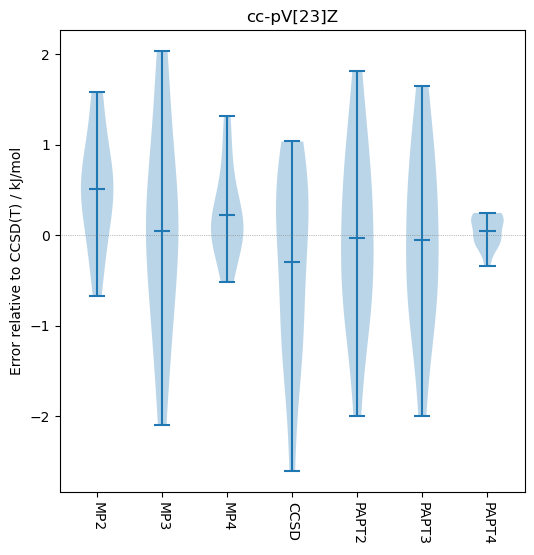

In [5]:
fig = violin_plot(bm)
fig.savefig((title + ' reaction energy deviations.pdf').replace(' ', '_'), transparent=True,bbox_inches='tight',pad_inches=0)
fig

In [6]:
len(bm['reaction energies'])

15

In [7]:
bm['reference'].references


{}

In [8]:
import shutil
from benchmark import unused_project_directories
for d in unused_project_directories(bm):
    shutil.rmtree(d)

In [9]:
from git import Repo
from benchmark import all_project_directories
repo = Repo('.')
repo.git.add(all_project_directories(bm))

''